# Matching Lambda_OU and Lambda_LogOU

In [47]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Functions for SIS White, OU and LogOU

In [48]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import expi

def compute_lognormal_ou_params(D, s):

    gamma_euler = 0.57721566490153286060  # Euler-Mascheroni constant

    V_lnOU = D**2 / (2*s)
    den = lamb**2 * (1 + np.sqrt(1 + (4*V_lnOU / lamb**2)))
    sigma2_by_2tau = np.log(1 + 2*V_lnOU/den)

    tau = s * (np.exp(sigma2_by_2tau) - 1) / (expi(sigma2_by_2tau) - np.log(sigma2_by_2tau) - gamma_euler)
    sigma = np.sqrt(sigma2_by_2tau * 2 * tau)

    return sigma, tau

def PCS_SDE_nd(h, N, X0, f, g):
    """
    Predictor-corrector scheme of Cao, Zhaong, and Karniadakis, SIAM J. SCI. COMPUT, 2015
    f = drift term, g = diffusion term
    
    Parameters:
    h (float): time step size
    N (int): number of steps
    X0 (numpy.ndarray): initial condition
    f (function): drift function
    g (function): diffusion function
    
    Returns:
    numpy.ndarray: simulated path
    """
    nd = len(X0)
    X = np.nan * np.ones((nd, N + 1))
    X[:, 0] = X0
    dW = np.sqrt(h) * np.random.randn(nd, N + 1)

    for j in range(N):
        X_bar = X[:, j] + h * f(X[:, j]) + g(X[:, j]) * dW[:, j]
        
        X[:, j + 1] = (X[:, j] + (h / 2) * (f(X[:, j]) + f(X_bar)) + 
                       (1 / 2) * ((g(X[:, j]) + g(X_bar)) * dW[:, j]))

    return X

def SIS_White(rel_int=0.5, R0=1.5, lamb=0.1, time_step=0.01, NN=10000, N=50, X0s=np.array([0.9]), plotting=True):

    gamma = lamb / R0
    sigma = np.sqrt(rel_int * lamb)

    def myDrift(X):
        return np.array([lamb * X * (1 - X) - gamma*X])

    def myDiffusion(X):
        return np.array([sigma * X * (1 - X)])
    
    Ys = []

    for _ in range(N):
        Xs = PCS_SDE_nd(time_step, NN, X0s, myDrift, myDiffusion)
        Ys.append(Xs[0, :])

    if plotting:
        for y in Ys:
            plt.plot(y)
        plt.title('SIS White Noise')
        plt.show()

    return Ys


def SIS_OU(rel_int=0.5, R0=1.5, lamb=0.1, time_step=0.01, NN=10000, N=50, 
           X0s=np.array([0.0, 0.9]), tau=0.2, plotting=True):
    """
    SIS model with Ornstein-Uhlenbeck (OU) noise.
    """
    gamma = lamb / R0
    sigma_OU = np.sqrt(rel_int * lamb)

    def myDrift(X):
        return np.array([
            - (1 / tau) * X[0],  
            (lamb + sigma_OU * X[0]) * X[1] * (1 - X[1]) - gamma * X[1]
            # (lamb + X[0]) * X[1] * (1 - X[1]) - gamma * X[1]
        ])

    def myDiffusion(X):
        return np.array([
            1 / tau, 0
        ])

    Ys = []

    for _ in range(N):
        Xs = PCS_SDE_nd(time_step, NN, X0s, myDrift, myDiffusion)
        Ys.append(Xs[1, :])

    if plotting:
        for y in Ys:
            plt.plot(y)
        plt.title('SIS OU Noise')
        plt.show()

    return Ys


def SIS_LogOU(rel_int=0.5, R0=1.5, lamb=0.1, time_step=0.01, NN=10000, N=50, 
              X0s=np.array([0.0, 0.9]), tau=0.2, plotting=True):
    """
    SIS model with lognormal Ornstein-Uhlenbeck (Log-OU) noise, ensuring same variance and correlation time as OU.
    """
    gamma = lamb / R0
    sigma_OU = np.sqrt(rel_int * lamb) 
    print(sigma_OU**2 / (2*tau))

    sigma_logOU, tau = compute_lognormal_ou_params(sigma_OU, tau)
    print(sigma_logOU, tau)
    
    def myDrift(X):
        return np.array([
            - (1 / tau) * X[0],
            (lamb * np.exp(sigma_logOU * X[0])) * X[1] * (1 - X[1]) - gamma * X[1]
            # (lamb * np.exp(X[0])) * X[1] * (1 - X[1]) - gamma * X[1]
        ])

    def myDiffusion(X):
        return np.array([
            1 / tau, 0
        ])

    Ys = []

    for _ in range(N):
        Xs = PCS_SDE_nd(time_step, NN, X0s, myDrift, myDiffusion)
        Ys.append(Xs[1, :])

    if plotting:
        for y in Ys:
            plt.plot(y)
        plt.title('SIS LogOU Noise')
        plt.show()

    return Ys


# SIS Model 1:

Gonorrhea

R0 = 1.4

lambda = 1.4

gamma = 1

rel_corr_time = 0.5

## Getting all trajectories

In [49]:
# Set parameters
skip = 5000

NN = 10000 # Number of time steps
N = 500 # Number of trajectories
time_step = 0.01 # Time step size
rel_corr_time = 0.5 # 0.1
R0 = 1.4
lamb = 1.4

time = np.arange(0, NN * time_step, time_step)[skip-1:]

gamma = lamb / R0
eta = 1 / (lamb - gamma)
tau = eta * rel_corr_time

print('R0 = ', R0)
print('lambda = ', lamb)
print('gamma = ', gamma)
print('characteristic time scale = ', eta)
print('tau = ', tau)

R0 =  1.4
lambda =  1.4
gamma =  1.0
characteristic time scale =  2.5000000000000004
tau =  1.2500000000000002


In [50]:
rel_intensities = np.linspace(0.05, 2.5, 50, endpoint=True)
rel_intensities

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 ,
       1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65,
       1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15, 2.2 ,
       2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 ])

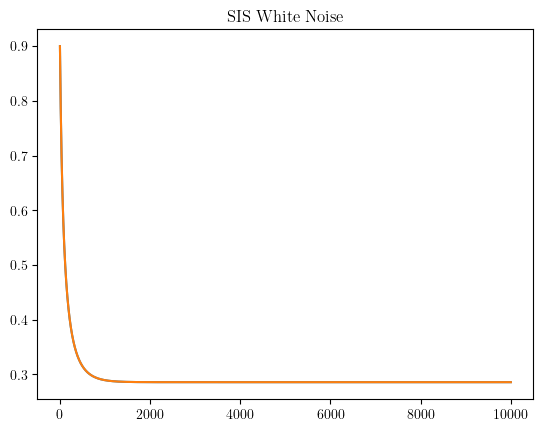

[[0.28571429 0.28571429 0.28571429 ... 0.28571429 0.28571429 0.28571429]
 [0.28571429 0.28571429 0.28571429 ... 0.28571429 0.28571429 0.28571429]]


In [52]:
import numpy as np
import matplotlib.pyplot as plt

for rel_int in [0]:#rel_intensities:
    white = SIS_White(rel_int, R0, lamb, time_step, NN, N=2, plotting=True)
    # ou = SIS_OU(rel_int, R0, lamb, time_step, NN, N=N, tau=tau, plotting=False)
    # logou = SIS_LogOU(rel_int, R0, lamb, time_step, NN, N=N, tau=tau, plotting=False)

    white = np.array(white)[:, skip:]
    # ou = np.array(ou)[:, skip:]
    # logou = np.array(logou)[:, skip:]

    # np.save(f'SIS_White_gonorrhea_{rel_corr_time}_{rel_int}.npy', white, allow_pickle=True)
    # np.save(f'SIS_OU_gonorrhea_{rel_corr_time}_{rel_int}.npy', ou, allow_pickle=True)
    # np.save(f'SIS_LogOU_gonorrhea_{rel_corr_time}_{rel_int}.npy', logou, allow_pickle=True)

    print(white)

# SIS Model 2:

Tuberculosis

R0 = 1.78

gamma = 1/6

rel_corr_time = 0.5

## Getting all trajectories

In [91]:
# Set parameters
skip = 5000

NN = 10000 # Number of time steps
N = 500 # Number of trajectories
time_step = 0.01 # Time step size
rel_corr_time = 0.5 # 0.1
R0 = 1.78
gamma = 1.0 / 6.0

time = np.arange(0, NN * time_step, time_step)[skip-1:]

lamb = gamma * R0
eta = 1 / (lamb - gamma)
tau = eta * rel_corr_time

print('R0 = ', R0)
print('lambda = ', lamb)
print('gamma = ', gamma)
print('characteristic time scale = ', eta)
print('tau = ', tau)

R0 =  1.78
lambda =  0.29666666666666663
gamma =  0.16666666666666666
characteristic time scale =  7.692307692307693
tau =  3.8461538461538467


In [92]:
rel_intensities = np.linspace(0.05, 2.5, 50, endpoint=True)
rel_intensities

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 ,
       1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65,
       1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15, 2.2 ,
       2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 ])

In [93]:
import numpy as np
import matplotlib.pyplot as plt

for rel_int in rel_intensities:
    white = SIS_White(rel_int, R0, lamb, time_step, NN, N=N, plotting=True)
    # ou = SIS_OU(rel_int, R0, lamb, time_step, NN, N=N, tau=tau, plotting=False)
    # logou = SIS_LogOU(rel_int, R0, lamb, time_step, NN, N=N, tau=tau, plotting=False)

    white = np.array(white)[:, skip:]
    # ou = np.array(ou)[:, skip:]
    # logou = np.array(logou)[:, skip:]

    np.save(rf'SIS_white/SIS_White_TB_{rel_corr_time}_{rel_int}.npy', white, allow_pickle=True)
    # np.save(f'SIS_OU_TB_{rel_corr_time}_{rel_int}.npy', ou, allow_pickle=True)
    # np.save(f'SIS_LogOU_TB_{rel_corr_time}_{rel_int}.npy', logou, allow_pickle=True)

    print(white)

KeyboardInterrupt: 

# Get KDEs Gonorrhea

In [94]:
import seaborn as sns
from numpy import interp

x = np.linspace(0.0, 1.0, 10000, endpoint=True)

In [95]:
# Set parameters
skip = 5000

NN = 10000 # Number of time steps
N = 500 # Number of trajectories
time_step = 0.01 # Time step size
rel_corr_time = 0.5 # 0.1
R0 = 1.4
lamb = 1.4

time = np.arange(0, NN * time_step, time_step)[skip-1:]

gamma = lamb / R0
eta = 1 / (lamb - gamma)
tau = eta * rel_corr_time

print('R0 = ', R0)
print('lambda = ', lamb)
print('gamma = ', gamma)
print('characteristic time scale = ', eta)
print('tau = ', tau)

R0 =  1.4
lambda =  1.4
gamma =  1.0
characteristic time scale =  2.5000000000000004
tau =  1.2500000000000002


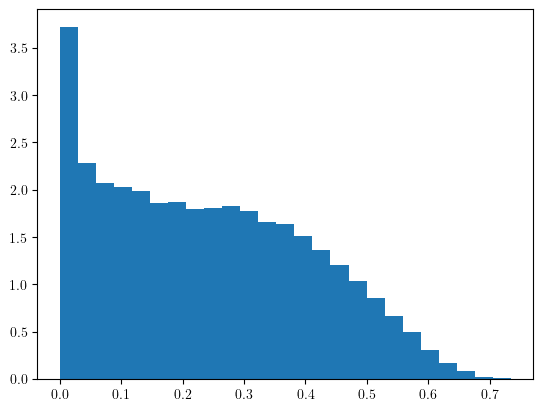

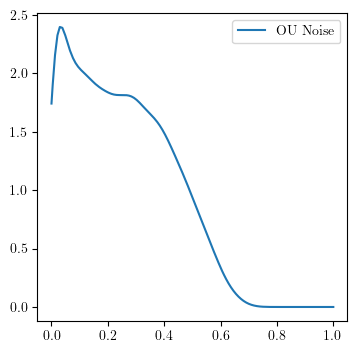

In [101]:
for rel_int in rel_intensities[16:17]:

# # WHITE
#     white = np.load(f'SIS_White_gonorrhea_{rel_corr_time}_{rel_int}.npy', allow_pickle=True)
#     test = np.concatenate((white))
#     plt.hist(test, bins=25, density=True)
#     plt.show()
#     # test = np.concatenate((test, np.zeros(5000)))

#     fig, ax = plt.subplots()
#     sns.kdeplot(test, ax=ax, bw_adjust=2.75, thresh=10, gridsize=100)
#     plt.close()
#     line = ax.get_lines()[0]
#     x_vals = line.get_xdata()
#     y_vals = line.get_ydata()

#     kde = interp(x, x_vals, y_vals)
#     np.save(rf'kdes/SIS_White_gonorrhea_{rel_corr_time}_{rel_int}.npy', kde, allow_pickle=True)

#     plt.figure(figsize=(4, 4))
#     plt.plot(x, kde, label='White Noise')
#     plt.legend()
#     plt.show()


# OU
    ou = np.load(f'SIS_OU_gonorrhea_{rel_corr_time}_{rel_int}.npy', allow_pickle=True)
    test = np.concatenate((ou))
    plt.hist(test, bins=25, density=True)
    plt.show()
    # test = np.concatenate((test, np.zeros(5000)))

    fig, ax = plt.subplots()
    sns.kdeplot(test, ax=ax, bw_adjust=3, thresh=10, gridsize=100)
    plt.close()
    line = ax.get_lines()[0]
    x_vals = line.get_xdata()
    y_vals = line.get_ydata()

    kde = interp(x, x_vals, y_vals)

    np.save(rf'kdes/SIS_OU_gonorrhea_{rel_corr_time}_{rel_int}.npy', kde, allow_pickle=True)

    plt.figure(figsize=(4, 4))
    plt.plot(x, kde, label='OU Noise')
    plt.legend()
    plt.show()


# # LogOU
#     logou = np.load(f'SIS_LogOU_gonorrhea_{rel_corr_time}_{rel_int}.npy', allow_pickle=True)
#     test = np.concatenate((logou))
#     plt.hist(test, bins=25, density=True)
#     plt.show()
#     # test = np.concatenate((test, np.zeros(5000)))

#     fig, ax = plt.subplots()
#     sns.kdeplot(test, ax=ax, bw_adjust=2.75, thresh=10, gridsize=100)
#     plt.close()
#     line = ax.get_lines()[0]
#     x_vals = line.get_xdata()
#     y_vals = line.get_ydata()

#     kde = interp(x, x_vals, y_vals)
#     np.save(rf'kdes/SIS_LogOU_gonorrhea_{rel_corr_time}_{rel_int}.npy', kde, allow_pickle=True)

#     plt.figure(figsize=(4, 4))
#     plt.plot(x, kde, label='LogOU Noise')
#     plt.legend()
#     plt.show()


# Get KDEs TB

In [102]:
import seaborn as sns
from numpy import interp

x = np.linspace(0.0, 1.0, 10000, endpoint=True)

In [145]:
# Set parameters
skip = 5000

NN = 10000 # Number of time steps
N = 500 # Number of trajectories
time_step = 0.01 # Time step size
rel_corr_time = 0.5 # 0.1
R0 = 1.78
gamma = 1.0 / 6.0

time = np.arange(0, NN * time_step, time_step)[skip-1:]

lamb = gamma * R0
eta = 1 / (lamb - gamma)
tau = eta * rel_corr_time

print('R0 = ', R0)
print('lambda = ', lamb)
print('gamma = ', gamma)
print('characteristic time scale = ', eta)
print('tau = ', tau)

R0 =  1.78
lambda =  0.29666666666666663
gamma =  0.16666666666666666
characteristic time scale =  7.692307692307693
tau =  3.8461538461538467


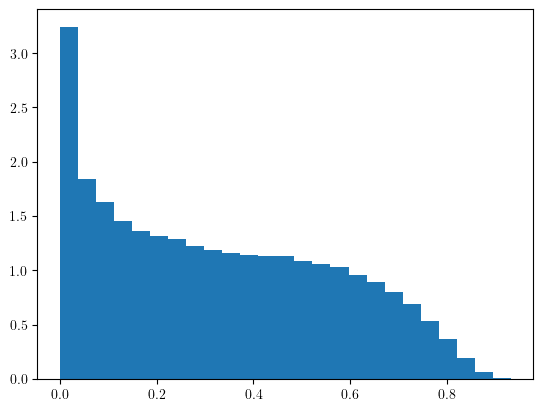

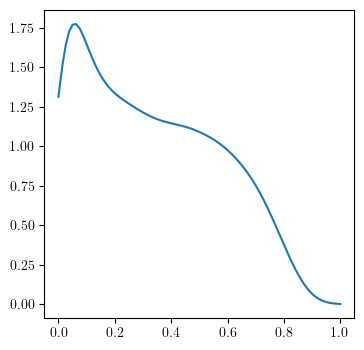

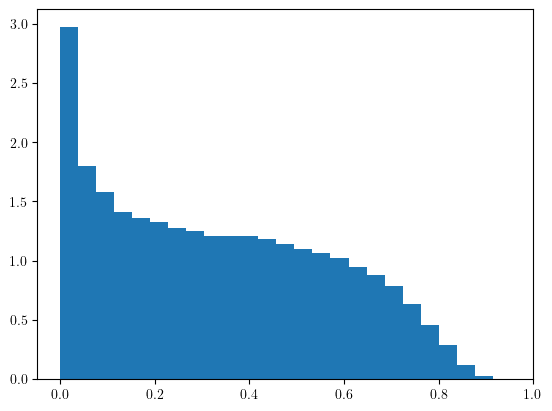

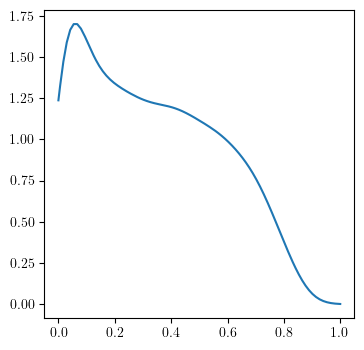

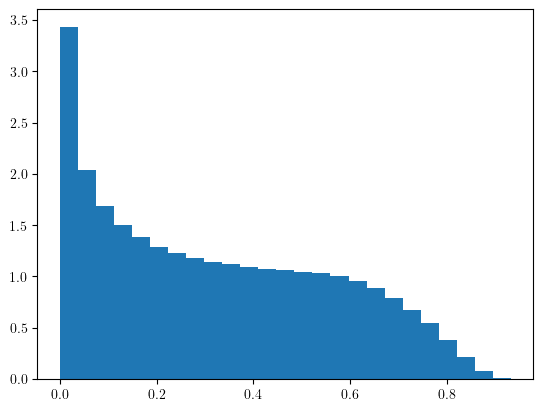

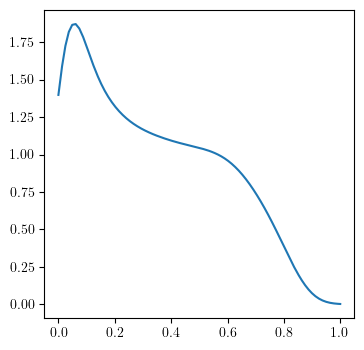

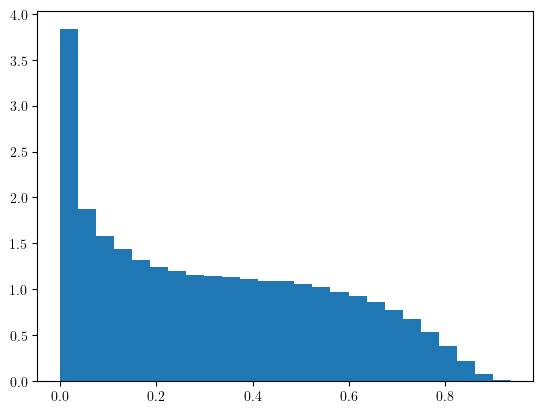

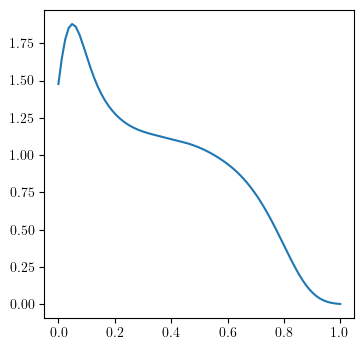

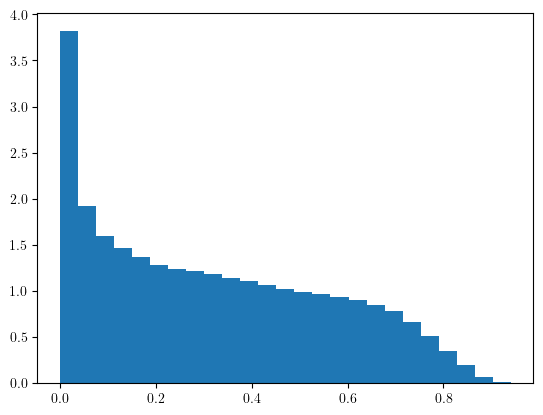

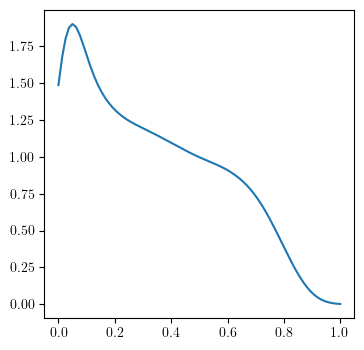

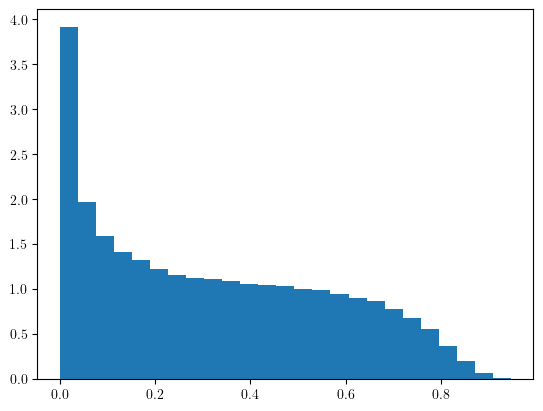

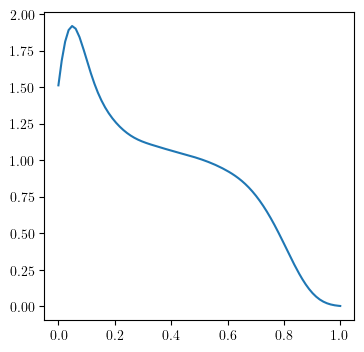

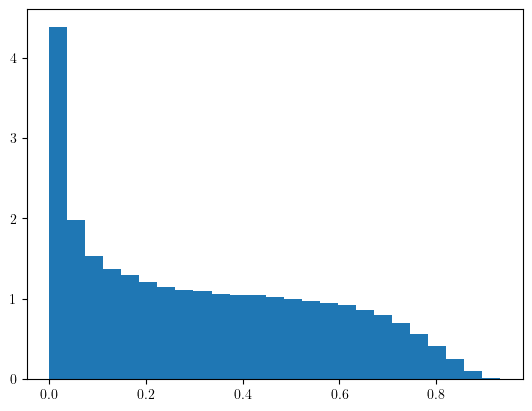

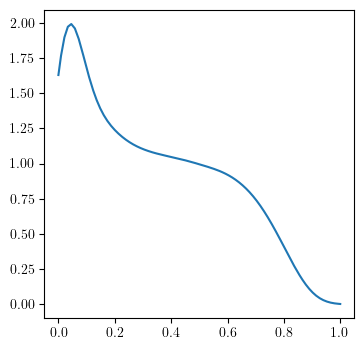

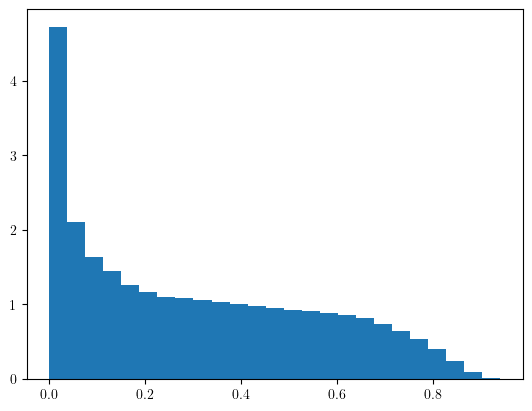

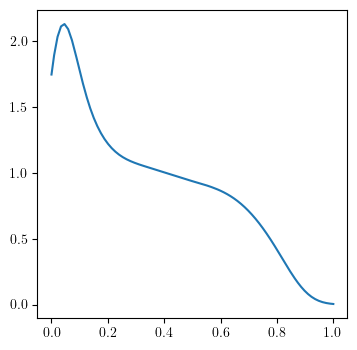

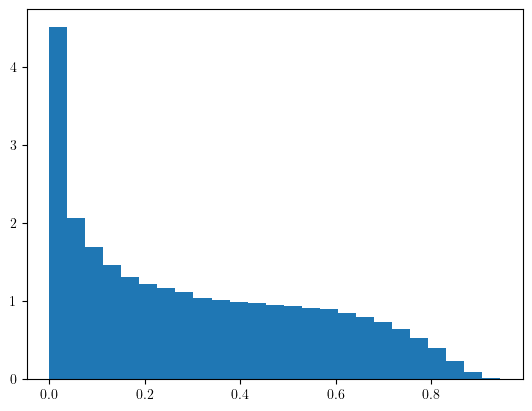

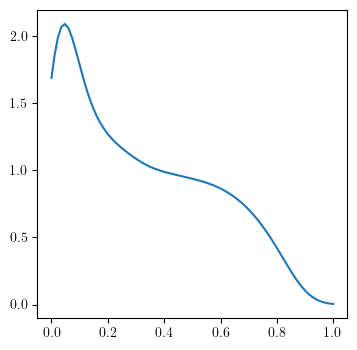

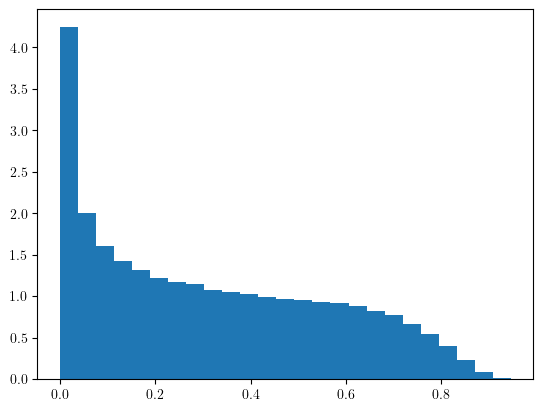

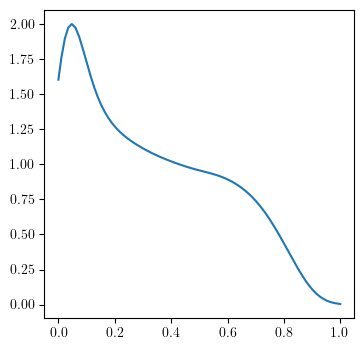

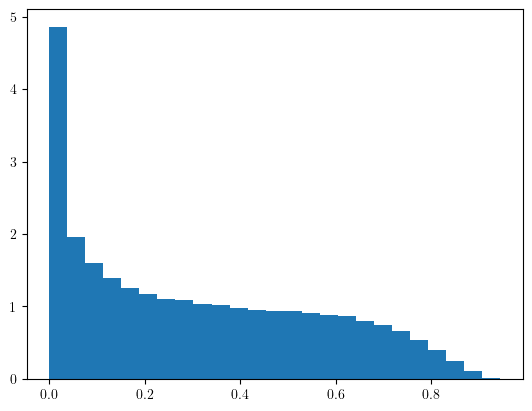

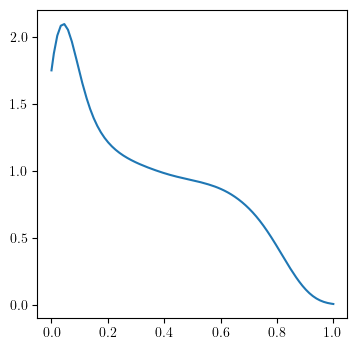

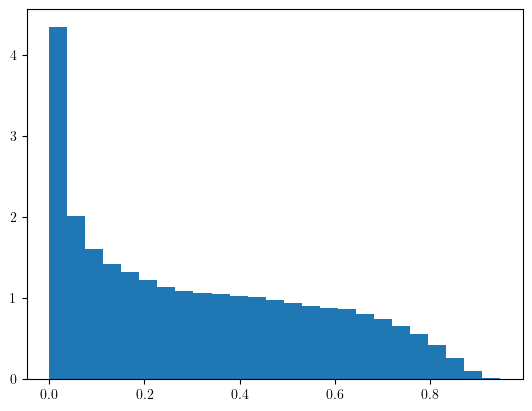

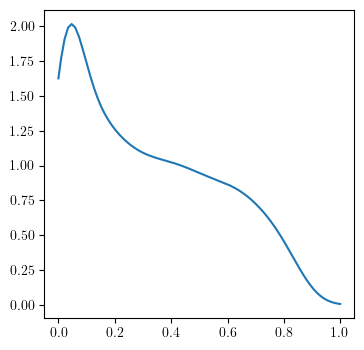

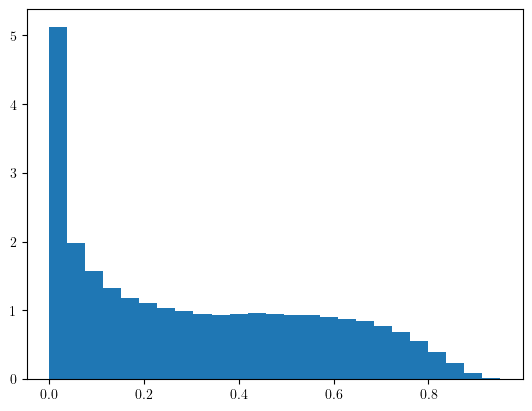

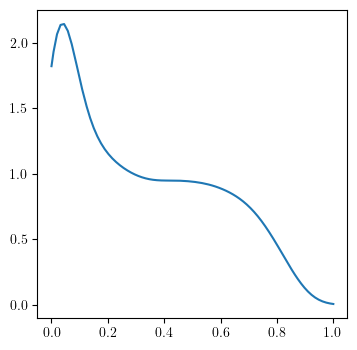

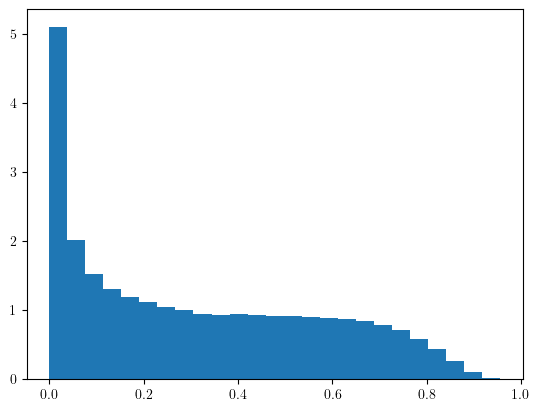

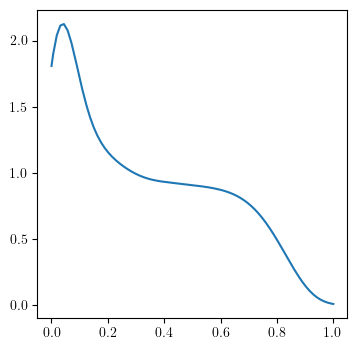

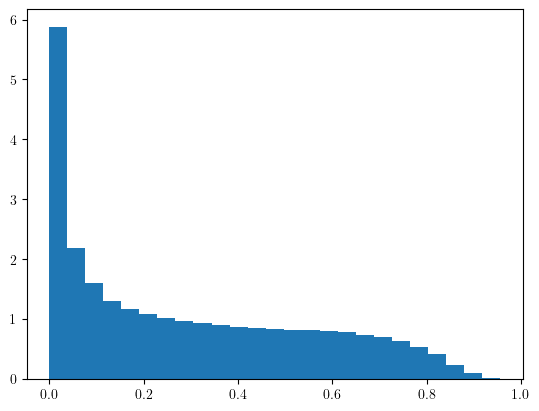

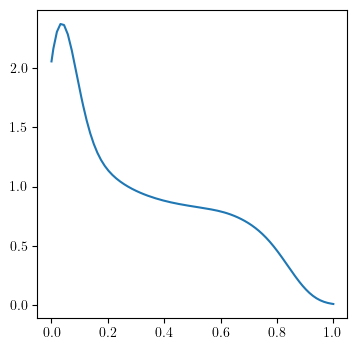

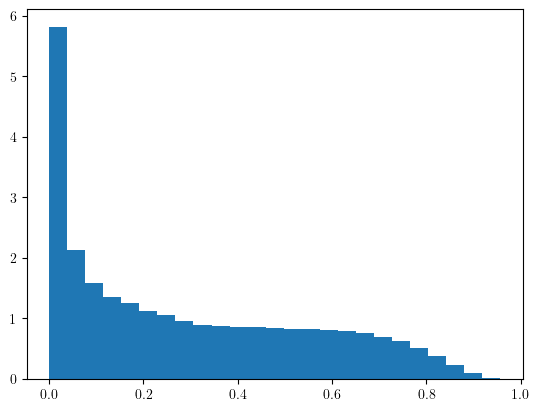

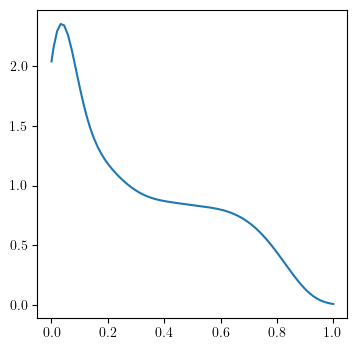

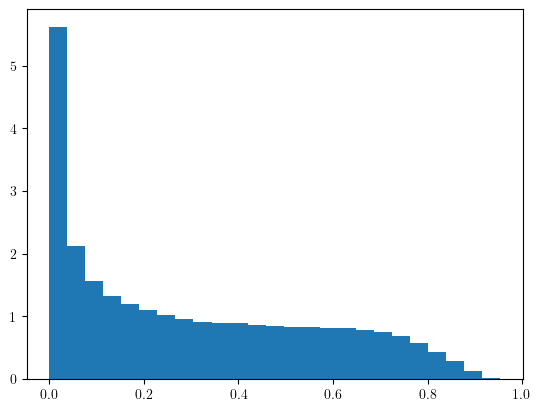

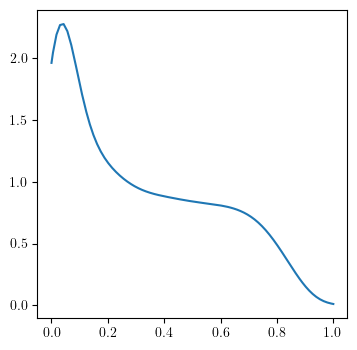

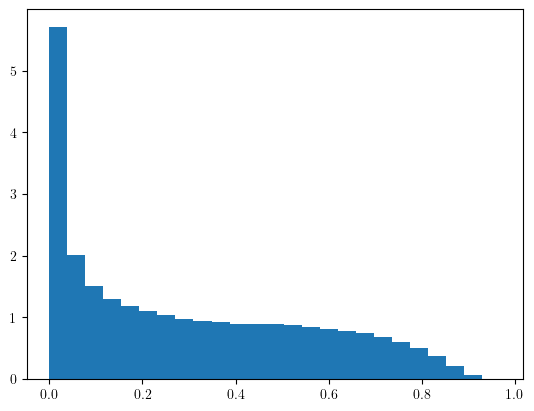

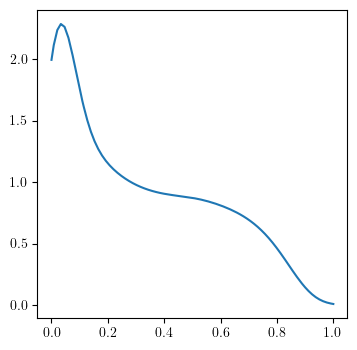

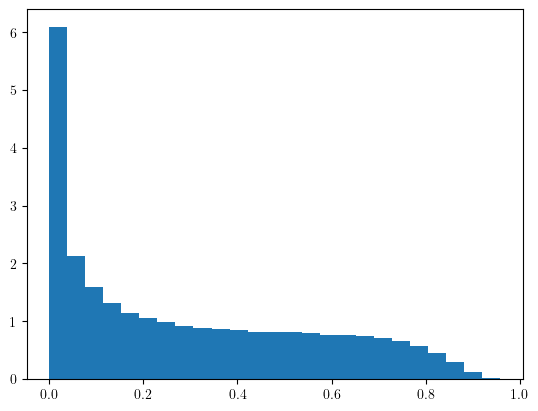

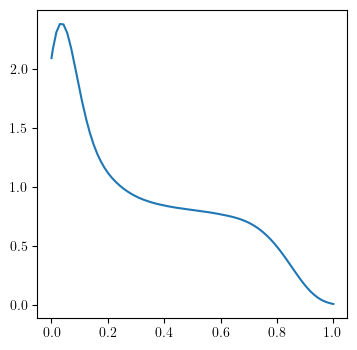

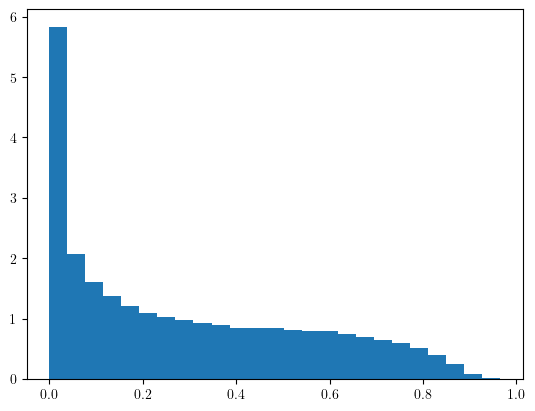

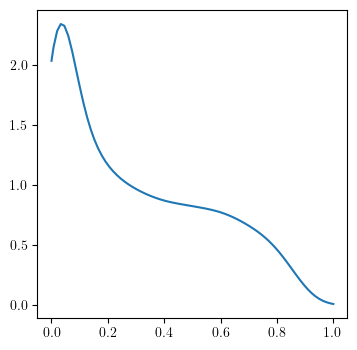

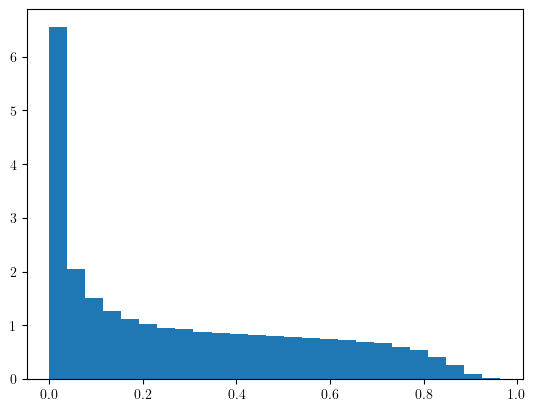

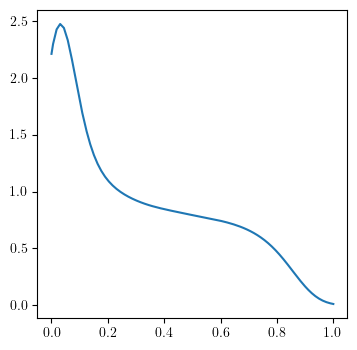

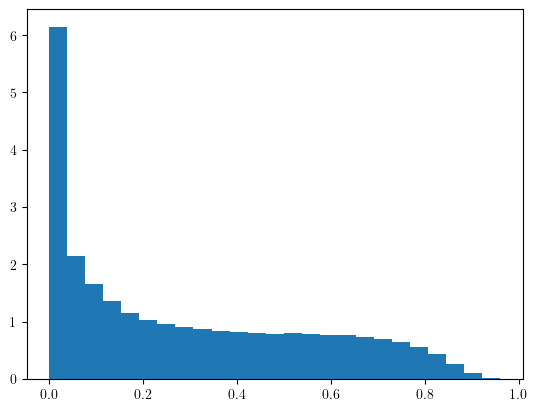

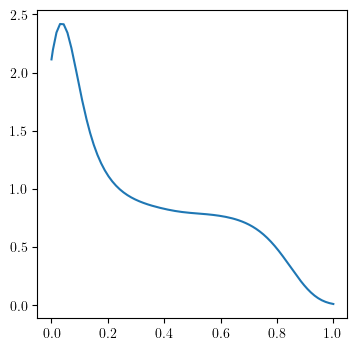

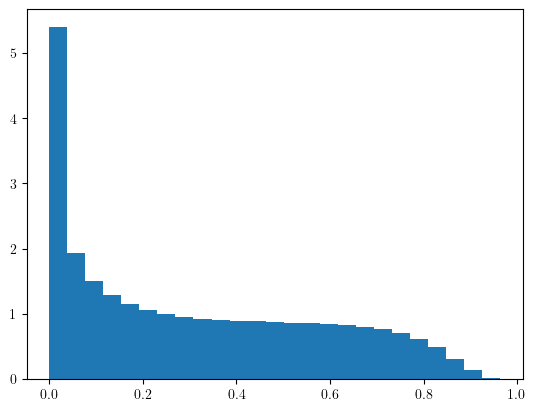

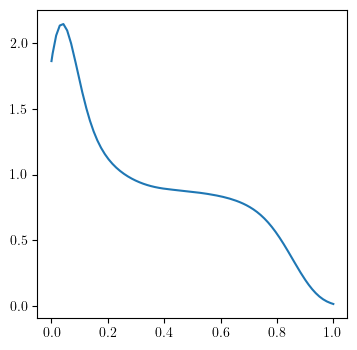

In [173]:
for rel_int in rel_intensities[27:]:

# WHITE
    white = np.load(rf'SIS_White/SIS_White_TB_{rel_corr_time}_{rel_int}.npy', allow_pickle=True)
    test = np.concatenate((white))
    plt.hist(test, bins=25, density=True)
    plt.show()
    # test = np.concatenate((test, np.random.normal(0.45, 0.01, 20000)))
    # test = np.concatenate((test, -0.01*np.ones(120000)))

    fig, ax = plt.subplots()
    sns.kdeplot(test, ax=ax, bw_adjust=4.0, thresh=0, gridsize=100)
    plt.close()
    line = ax.get_lines()[0]
    x_vals = line.get_xdata()
    y_vals = line.get_ydata()

    kde = interp(x, x_vals, y_vals)
    np.save(rf'kdes/SIS_White_TB_{rel_corr_time}_{rel_int}.npy', kde, allow_pickle=True)

    plt.figure(figsize=(4, 4))
    plt.plot(x, kde)
    plt.show()


# # OU
#     ou = np.load(rf'SIS_OU_TB_{rel_corr_time}_{rel_int}.npy', allow_pickle=True)
#     test = np.concatenate((ou))
#     plt.hist(test, bins=25, density=True)
#     plt.show()
#     # test = np.concatenate((test, np.zeros(5000)))

#     fig, ax = plt.subplots()
#     sns.kdeplot(test, ax=ax, bw_adjust=5, thresh=10, gridsize=100)
#     plt.close()
#     line = ax.get_lines()[0]
#     x_vals = line.get_xdata()
#     y_vals = line.get_ydata()

#     kde = interp(x, x_vals, y_vals)

#     np.save(rf'kdes/SIS_OU_TB_{rel_corr_time}_{rel_int}.npy', kde, allow_pickle=True)

#     plt.figure(figsize=(4, 4))
#     plt.plot(x, kde)
#     plt.show()


# # LogOU
#     logou = np.load(rf'SIS_LogOU_TB_{rel_corr_time}_{rel_int}.npy', allow_pickle=True)
#     test = np.concatenate((logou))
#     plt.hist(test, bins=25, density=True)
#     plt.show()
#     # test = np.concatenate((test, np.zeros(5000)))

#     fig, ax = plt.subplots()
#     sns.kdeplot(test, ax=ax, bw_adjust=6, thresh=10, gridsize=100)
#     plt.close()
#     line = ax.get_lines()[0]
#     x_vals = line.get_xdata()
#     y_vals = line.get_ydata()

#     kde = interp(x, x_vals, y_vals)
#     np.save(rf'kdes/SIS_LogOU_TB_{rel_corr_time}_{rel_int}.npy', kde, allow_pickle=True)

#     plt.figure(figsize=(4, 4))
#     plt.plot(x, kde)
#     plt.show()
